In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('clean_zomato_restaurant.csv')

In [3]:
data.head()

,Unnamed: 0,address,cost_for_two,cuisines,locality,rating,rest_name,type,votes
0,0,"AEON Mall, Lantai 1, Jl. Jakarta Garden City,...",60000,"['Taiwanese', 'Beverages']","AEON Mall, Cakung",4.1,Kamu Tea Cafe ...,Beverage Shop,127
1,1,"Jl. Condet Raya No. 50, Kramat Jati, Jakarta",185000,['Arabian'],Kramat Jati,4.3,Ajwad,Quick Bites,289
2,2,"Jl. Rawa Domba, Pondok Bambu, Jakarta",100000,['Indonesian'],Pondok Bambu,4.3,MASALALU,Quick Bites,542
3,3,"Jl. Pertengahan 5, Cijantung, Jakarta",80000,['Indonesian'],Cijantung,4.1,Hakuna Matata ...,Quick Bites,76
4,4,"Jl. Sunan Giri No. 3, Lantai 2, Rawamangun, J...",150000,"['Asian', 'Western', 'Indonesian']",Rawamangun,0.0,Meet/N/Work Coffee & Eatery ...,Café,0


In [4]:
data.tail()

,Unnamed: 0,address,cost_for_two,cuisines,locality,rating,rest_name,type,votes
1670,1670,"Jl. Batu Ampar 3, Kramat Jati, Jakarta",60000,['Indonesian'],Kramat Jati,0.0,Ayam Geprek Geledek D'Eza ...,Quick Bites,0
1671,1671,"Jl. Curug Raya No. 11, Kalimalang, Jakarta",100000,"['Indonesian', 'Western']",Kalimalang,0.0,Clara Cafe by Pasta Kangen ...,Quick Bites,0
1672,1672,"Jl. Dewi Sartika no. 192, Cawang, Jakarta",150000,['Asian'],Cawang,0.0,Bakoel Ussy,Casual Dining,0
1673,1673,"Food Garden, Blok A No.1-2, Jakarta Garden Ci...",80000,"['Coffee', 'Indonesian']",Cakung,0.0,Tonks,Quick Bites,0
1674,1674,"AEON Mall, Lantai 3, Gourmet Garden, Jl. Jaka...",100000,"['Jawa', 'Sunda']","AEON Mall, Cakung",0.0,Pusat Nasi Bakar ...,Food Court,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 9 columns):
Unnamed: 0      1675 non-null int64
address         1675 non-null object
cost_for_two    1675 non-null int64
cuisines        1675 non-null object
locality        1675 non-null object
rating          1675 non-null float64
rest_name       1675 non-null object
type            1675 non-null object
votes           1675 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 117.9+ KB


In [6]:
data.columns

Index(['Unnamed: 0', 'address', 'cost_for_two', 'cuisines', 'locality',
       'rating', 'rest_name', 'type', 'votes'],
      dtype='object')

In [7]:
data.shape

(1675, 9)

In [8]:
data.describe()

,Unnamed: 0,cost_for_two,rating,votes
count,1675.000000,1675.000000,1675.000000,1675.000000
mean,837.000000,100052.537313,1.953612,24.255522
std,483.675166,61979.625206,1.697029,76.613401
min,0.000000,20000.000000,0.000000,0.000000
25%,418.500000,60000.000000,0.000000,0.000000
50%,837.000000,80000.000000,3.000000,5.000000
75%,1255.500000,120000.000000,3.500000,20.000000
max,1674.000000,550000.000000,4.700000,1332.000000


In [9]:
data.isna().sum()

Unnamed: 0      0
address         0
cost_for_two    0
cuisines        0
locality        0
rating          0
rest_name       0
type            0
votes           0
dtype: int64

In [10]:
data.drop(columns=['address'], inplace  =True)

In [11]:
data.rename(columns={'cost_for_two': 'average_cost'}, inplace=True)

In [12]:
data.rest_name.value_counts().head()

PHD                                                     10
Kedai Kopi Kulo                                          9
Kopi Janji Jiwa                                          9
Roti 'O                                                  9
Kopi Kenangan                                            8
Name: rest_name, dtype: int64

Text(0.5, 1.0, 'Banyaknya Restoran')

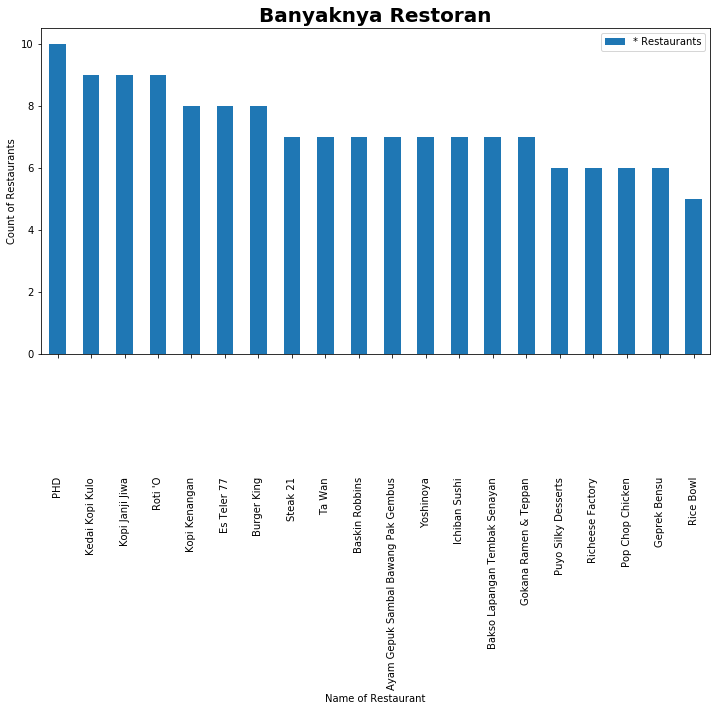

In [13]:
plt.figure(figsize = (12,6))
ax = data.rest_name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Banyaknya Restoran",fontsize =20, weight = 'bold')

In [14]:
data['locality'].value_counts()[:10]

Cibubur                               104
Pulo Gadung                            98
AEON Mall, Cakung                      86
Rawamangun                             81
Kramat Jati                            76
Duren Sawit                            67
Mall@Bassura City, Jatinegara          59
Matraman                               58
Trans Studio Mall Cibubur, Cibubur     54
Klender                                52
Name: locality, dtype: int64

Text(0.5, 1.0, 'Locality')

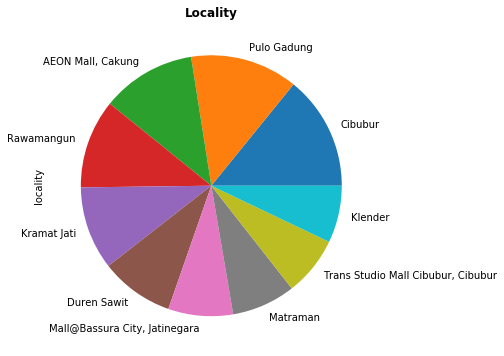

In [15]:
plt.figure(figsize=(12,6)) 
data['locality'].value_counts()[:10].plot(kind = 'pie')
plt.title('Locality', weight = 'bold')

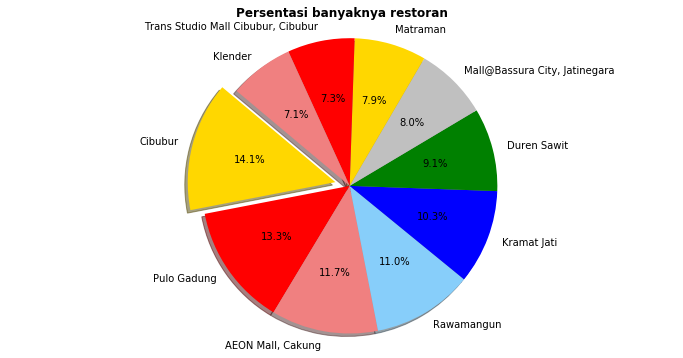

In [16]:
plt.figure(figsize = (12,6))
names = data['locality'].value_counts()[:10].index
values = data['locality'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Persentasi banyaknya restoran", weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Banyaknya Restoran Perwilayah')

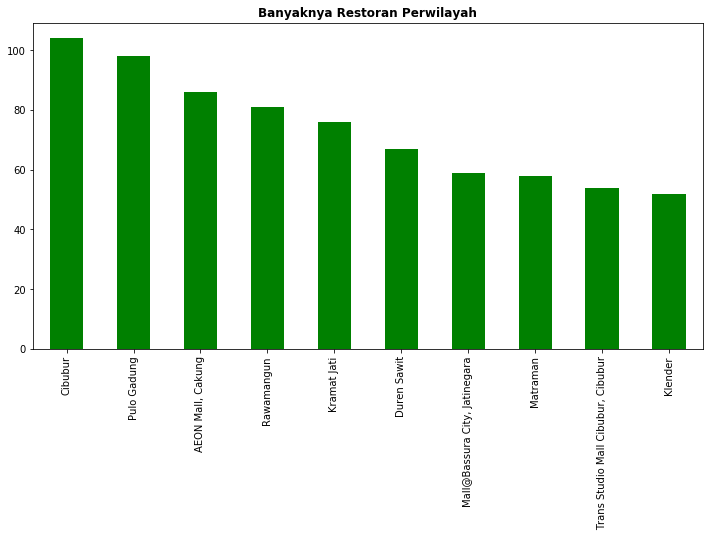

In [17]:
plt.figure(figsize = (12,6))
data['locality'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Banyaknya Restoran Perwilayah", weight = 'bold')

In [18]:
data['locality'].nunique()

92

In [19]:
data['type'].value_counts().head(10)

Quick Bites       767
Food Court        193
Casual Dining     168
Café              157
Beverage Shop     119
Kiosk              64
Bakery             56
Toko Minuman       41
Dessert Parlor     39
Street Vendor      25
Name: type, dtype: int64

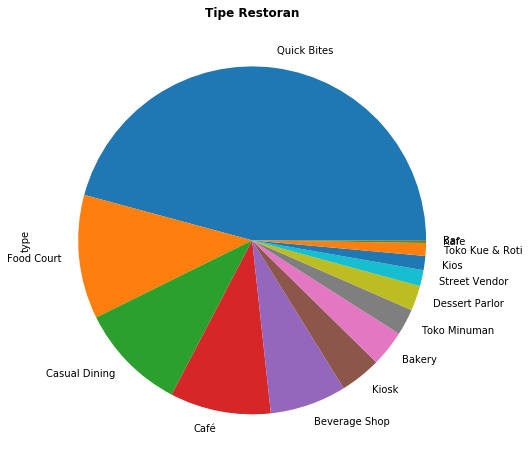

In [20]:
plt.figure(figsize = (14,8))
data.type.value_counts()[:15].plot(kind = 'pie')
plt.title('Tipe Restoran', weight = 'bold')
plt.show()

In [21]:
colors = ['#800080','red','#00FFFF','#FFFF00','#00FF00','#FF00FF']

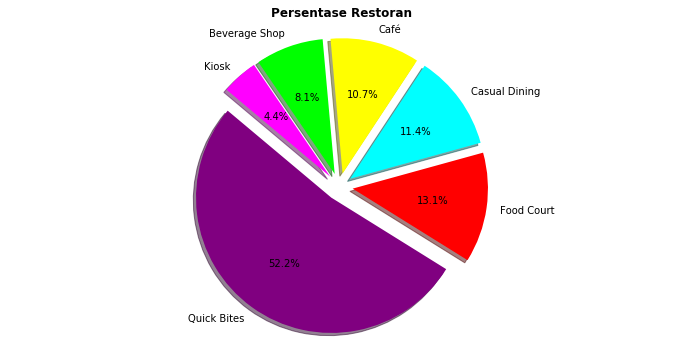

In [22]:
plt.figure(figsize = (12,6))
names = data['type'].value_counts()[:6].index
values = data['type'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Persentase Restoran', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [24]:
data['average_cost'].value_counts()[:20]

80000     248
100000    245
50000     242
60000     161
150000    119
70000     119
120000    100
200000     69
40000      47
30000      47
90000      31
250000     28
130000     26
160000     22
110000     21
300000     18
125000     12
75000      11
180000     10
20000       9
Name: average_cost, dtype: int64

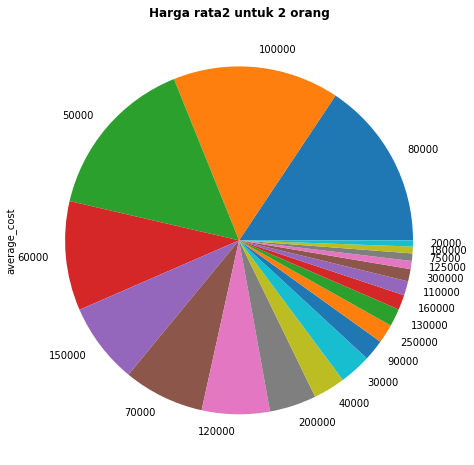

In [25]:
plt.figure(figsize = (12,8))
data['average_cost'].value_counts()[:20].plot(kind = 'pie')
plt.title('Harga rata2 untuk 2 orang', weight = 'bold')
plt.show()

In [26]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5, 1.0, 'Harga Untuk 2 orang')

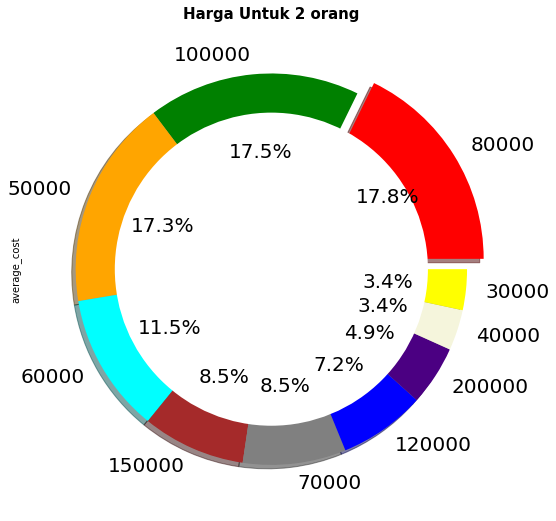

In [27]:
import matplotlib_venn
fig= plt.figure(figsize=(18, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['average_cost'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Harga Untuk 2 orang",fontsize = 15,weight = 'bold')

In [28]:
data['rating'] = data['rating'].replace('NEW',np.NaN)
data['rating'] = data['rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [29]:
data['rating'] = data.loc[:,'rating'].replace('[ ]','',regex = True)
data['rating'] = data['rating'].astype(str)
data['rating'] = data['rating'].apply(lambda r: r.replace('/5',''))
data['rating'] = data['rating'].apply(lambda r: float(r))

1.9536119402985082


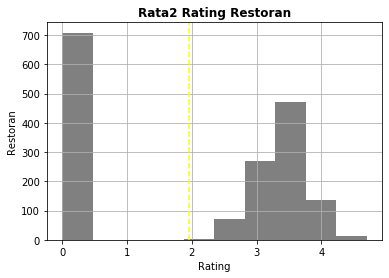

In [32]:
data.rating.hist(color='grey')
plt.axvline(x= data.rating.mean(),ls='--',color='yellow')
plt.title('Rata2 Rating Restoran',weight='bold')
plt.xlabel('Rating')
plt.ylabel('Restoran')
print(data.rating.mean())

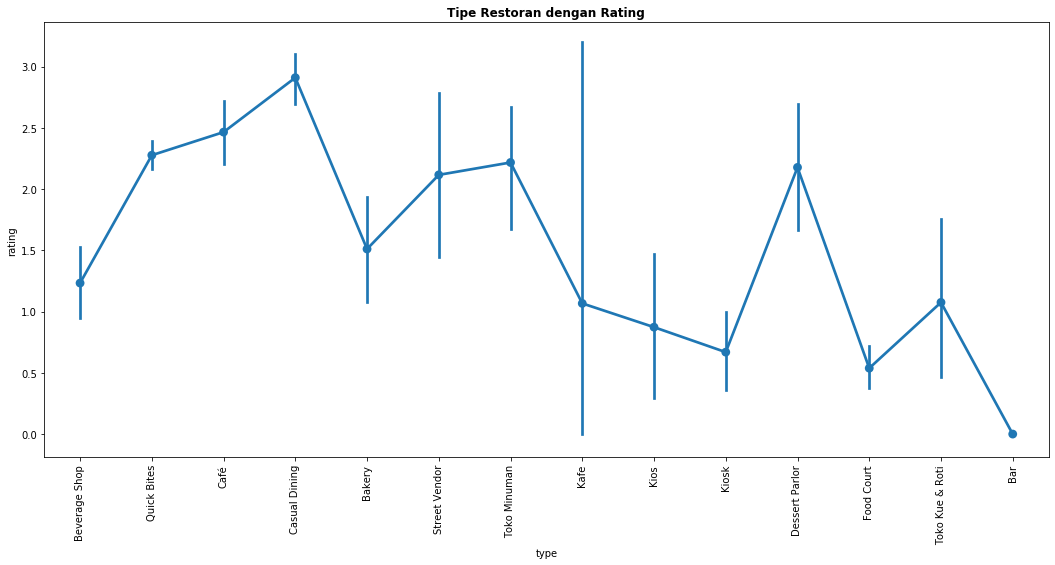

In [33]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["type"], y=data["rating"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Tipe Restoran dengan Rating', weight = 'bold')
plt.show()

In [35]:
cuisines_data = data[data.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [36]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'Restoran')

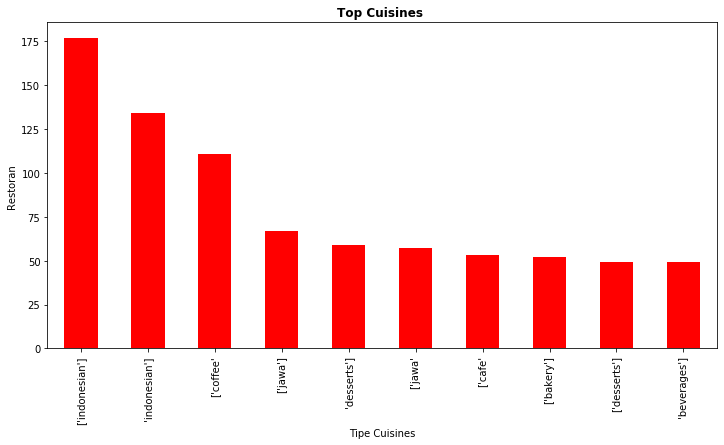

In [37]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top Cuisines ',weight='bold')
plt.xlabel('Tipe Cuisines')
plt.ylabel('Restoran')

In [38]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
data['locality'] = T.fit_transform(data['locality'])
data['type'] = T.fit_transform(data['type'])
data['cuisines'] = T.fit_transform(data['cuisines'])
#data['dish_liked'] = T.fit_transform(data['dish_liked'].

In [39]:
data["average_cost"] = data["average_cost"].astype('float')

In [40]:
data.head()

,Unnamed: 0,average_cost,cuisines,locality,rating,rest_name,type,votes
0,0,60000.0,365,19,4.1,Kamu Tea Cafe ...,2,127
1,1,185000.0,12,49,4.3,Ajwad,10,289
2,2,100000.0,215,65,4.3,MASALALU,10,542
3,3,80000.0,215,29,4.1,Hakuna Matata ...,10,76
4,4,150000.0,18,71,0.0,Meet/N/Work Coffee & Eatery ...,3,0


In [41]:
x = data.drop(['rating','rest_name'],axis = 1)

In [42]:
y = data['rating']

In [43]:
x.shape

(1675, 6)

In [44]:
y.shape

(1675,)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1674
Data columns (total 8 columns):
Unnamed: 0      1675 non-null int64
average_cost    1675 non-null float64
cuisines        1675 non-null int32
locality        1675 non-null int32
rating          1675 non-null float64
rest_name       1675 non-null object
type            1675 non-null int32
votes           1675 non-null int64
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 178.1+ KB


In [47]:
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])

In [48]:
data.head()

,Unnamed: 0,average_cost,cuisines,locality,rating,rest_name,type,votes
0,-1.731017,-0.646414,365,19,1.265169,Kamu Tea Cafe ...,2,1.341478
1,-1.728949,1.370980,12,49,1.383057,Ajwad,10,3.456622
2,-1.726881,-0.000848,215,65,1.383057,MASALALU,10,6.759902
3,-1.724813,-0.323631,215,29,1.265169,Hakuna Matata ...,10,0.675599
4,-1.722745,0.806110,18,71,-1.151539,Meet/N/Work Coffee & Eatery ...,3,-0.316691


In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [50]:
lr.score(X_test, y_test)*100

34.484828908579125

In [260]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [261]:
rfr.score(X_test,y_test)*100

98.29007894556939

In [262]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [263]:
rdg.score(X_test,y_test)*100

34.484877581454946

In [264]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [265]:
ls.score(X_test,y_test)*100

33.85229242258724

In [266]:
onehot = pd.read_csv("clean_zomato_restaurant.csv")
onehot.head()

,Unnamed: 0,address,cost_for_two,cuisines,locality,rating,rest_name,type,votes
0,0,"AEON Mall, Lantai 1, Jl. Jakarta Garden City,...",60000,"['Taiwanese', 'Beverages']","AEON Mall, Cakung",4.1,Kamu Tea Cafe ...,Beverage Shop,127
1,1,"Jl. Condet Raya No. 50, Kramat Jati, Jakarta",185000,['Arabian'],Kramat Jati,4.3,Ajwad,Quick Bites,289
2,2,"Jl. Rawa Domba, Pondok Bambu, Jakarta",100000,['Indonesian'],Pondok Bambu,4.3,MASALALU,Quick Bites,542
3,3,"Jl. Pertengahan 5, Cijantung, Jakarta",80000,['Indonesian'],Cijantung,4.1,Hakuna Matata ...,Quick Bites,76
4,4,"Jl. Sunan Giri No. 3, Lantai 2, Rawamangun, J...",150000,"['Asian', 'Western', 'Indonesian']",Rawamangun,0.0,Meet/N/Work Coffee & Eatery ...,Café,0


In [267]:
onehot['rating'] = onehot['rating'].replace('NEW',np.NaN)
onehot['rating'] = onehot['rating'].replace('-',np.NaN)
onehot.dropna(how = 'any', inplace = True)

onehot['rating'] = onehot.loc[:,'rating'].replace('[ ]','',regex = True)
onehot['rating'] = onehot['rating'].astype(str)
onehot['rating'] = onehot['rating'].apply(lambda r: r.replace('/5',''))
onehot['rating'] = onehot['rating'].apply(lambda r: float(r))

In [268]:
onehot['cuisines'] = onehot['cuisines'].str.replace(',' , '') 
onehot['cuisines'] = onehot['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['cuisines'].unique()

array(["'Beverages'] ['Taiwanese'", "['Arabian']", "['Indonesian']",
       "'Indonesian'] 'Western' ['Asian'", "'Western'] ['Steak'",
       "'BBQ'] ['Japanese'", "['Japanese']",
       "'Ramen'] 'Sushi' ['Japanese'", "'Desserts'] 'Western' ['Asian'",
       "'Cafe' 'Coffee' 'Tea'] ['Indonesian'",
       "'Indonesian' 'Western'] ['Cafe'", "'Italian'] ['Asian'",
       "'Italian'] ['Mexican'", "'Ramen'] ['Japanese'",
       "'Bubble 'Desserts'] Tea' ['Japanese'", "'Chinese'] ['Bakmi'",
       "'Chinese'] 'Jawa' ['Bakmi'", "['Coffee']", "'Grill'] ['Korean'",
       "'Mediterranean'] 'Middle Eastern' ['Arabian'",
       "'Beverages'] ['Coffee'", "['Cafe']", "['Bakery']",
       "'Coffee' 'Tea'] 'Western' ['Cafe'", "['Betawi']", "['Padang']",
       "'Martabak'] Food' ['Street", "'Desserts'] ['Coffee'",
       "'Indonesian'] 'Seafood' ['Jawa'", "['Chinese']",
       "'Japanese'] ['Ramen'", "'Italian'] ['Pizza'",
       "'Coffee' 'Desserts' 'Tea'] ['Cafe'", "['Korean']", "['Bakso']",
     

In [269]:
onehot['type'] = onehot['type'].str.replace(',' , '') 
onehot['type'] = onehot['type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['type'].value_counts().head()

Bites Quick      767
Court Food       193
Casual Dining    168
Café             157
Beverage Shop    119
Name: type, dtype: int64

In [270]:
dummy_rest_type=pd.get_dummies(onehot['type'])
dummy_city=pd.get_dummies(onehot['locality'])
dummy_cuisines=pd.get_dummies(onehot['cuisines'])

In [271]:
final=pd.concat([onehot,dummy_rest_type,dummy_city,dummy_cuisines],axis=1)

In [272]:
final.drop(columns=['type','locality','cuisines'] , inplace=True)
final.drop(columns=['address'], inplace=True)

In [273]:
final

,Unnamed: 0,cost_for_two,rating,rest_name,votes,& Kue Roti Toko,Bakery,Bar,Beverage Shop,Bites Quick,...,['Singaporean'],['Snacks'],['Soto'],['Steak'],['Sumatera'],['Sunda'],['Thai'],['Vietnamese'],['Western'],['Yogyakarta']
0,0,60000,4.1,Kamu Tea Cafe ...,127,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,185000,4.3,Ajwad,289,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,100000,4.3,MASALALU,542,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,80000,4.1,Hakuna Matata ...,76,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,150000,0.0,Meet/N/Work Coffee & Eatery ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,450000,3.9,Abuba Steak,190,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,450000,3.9,Abuba Steak,190,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,550000,4.7,Gyu - Kaku Japanese BBQ ...,1253,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,550000,4.7,Gyu - Kaku Japanese BBQ ...,1253,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,200000,4.6,Kimukatsu,339,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
x = final.drop(['rating'],axis=1)
y = final['rating']

In [275]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [276]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

ValueError: could not convert string to float: 'Bakso Daging Sapi Bang Eric                                     '